# Shopify Data Analytics Development Problem

100 shops and every shop sells a unique model of shoe. We want to find out the Average Order Value for a given window of 30 days. Let's see what we can do.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Starting off with importing the necessary libraries and the given data.

In [2]:
shop_data = pd.read_excel('desktop/data.xlsx')

In [3]:
shop_data.columns.values

array(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'], dtype=object)

In [4]:
shop_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Using describe, we get a summary of the dataset's distribution. We can also observe that 'payment_method' and 'created_at' are not included due their column values not being numerical.

In [5]:
shop_data['order_amount'].mean()

3145.128

As we can see, the given AOV was calculated by taking the mean 'order_amount' of the dataset.

Right off the bat there are a few things that we are able to notice. Since we are looking at AOV, 'order_amount' will be the column we will want to keep an eye on. 

We should also keep in mind that Average Order Value is different from Average Item Value. Since AOV can include more than one item purchased, it is not unreasonable to have a number that is slightly bigger than the average market value of a sneaker.

In [6]:
shop_data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We can see, however, that the Max of 'order_amount' is disproportionate, thus skewing the data far to the right. This will be something we will look to fix when cleaning the data.

Before we begin the cleaning, we will be adding a new column, 'per_item', which will give us a per item cost. This will help us better understand the dataset by allowing us (in the end) to not only see AOV, but also Average Item Value. 

In [7]:
shop_data['per_item'] = np.divide(shop_data.order_amount, shop_data.total_items)

Now, we can take another look with describe.

In [8]:
shop_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,per_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


After adding in the column, we can see that the mean 'per_item' cost is \$387.74.

For now, let's start working with the 'per_item' cost a bit. Since 'order_amount' is very much dependent on the number of items bought, it is harder to gauge what an ideal 'order_amount' would be. What is easier to evaluate is the 'per_item' cost. Since we know a sneaker is around the \$150 mark, we can start by trimming down the mean of 'per_item'.

For our next step, we are going to make a quick initial assumption. In my opinion, anything past the \$500 mark is nearing the 'damn, that's some rare hypebeast Yeezys' type of shoes. In other words, I feel that anything over the 'per_item' price of \$500 might prove to be an outlier.

In [9]:
shop_data.query('per_item > 500')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,per_item
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20,25725.0


There we have it. Immidiately we can see that we ran into something odd. It seems like 'shop_id' 78 is selling shoes made out of diamonds. At \$25725 per item, this is definitely an outlier in our data.

We should make it a point to show this data to the appropriate team/manager, but for now, let's remove it and keep on going.

In [10]:
shop_data_v2 = shop_data[shop_data.shop_id != 78]

In [11]:
shop_data_v2.describe()

,order_id,shop_id,user_id,order_amount,total_items,per_item
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


After the removal of 'shop_id' 78, we are much closer to an actual AOV. With the AOV at \$2717.37, we can also see that the 'per_item' price also accurately reflects the average price for a quality sneaker. The Max of 'order_amount', 'total_items', and 'per_item' are still high. Let's see if we can clean them up in the next steps.

One thing that we have not yet checked for in the dataset is if there are any duplicate data. This might be one of the reasons for the data skew.

In [12]:
dupes = shop_data_v2[shop_data_v2.duplicated(['created_at', 'shop_id'],keep = False)]

dupes.sort_values(['created_at'], ascending = True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,per_item
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0


From the data shown, we can see that there are indeed duplicates for 'shop_id' 42. There are two different conclusions that this data may lead to. Since we do not have more data to further validate, the most we can do right now is to consider the different conclusions.

- one: these are indeed duplicates, and thus one entry has to be removed
- two: these are bulk orders, but the order cap is set at 2000. This forces the buyer to make multiple 2000 item orders

After evaluating the two options, personally, I find that this must be a bulk order from the user. However, we will still consider these transactions as outliers, as the 'per_item' cost and 'total_items' count are too far out from our mean (it is actually our Max value for both 'total_items' and 'per_item' cost).

In [13]:
shop_data_v3 = shop_data_v2[shop_data_v2.shop_id != 42]

In [14]:
shop_data_v3.describe()

,order_id,shop_id,user_id,order_amount,total_items,per_item
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


In [15]:
shop_data_v3.std()

order_id        1444.221163
shop_id           29.154367
user_id           86.887947
order_amount     155.941112
total_items        0.982602
per_item          23.851202
dtype: float64

Now that we have removed 'shop_id' 48, our Max value for 'order_amount', 'total_items', and 'per_item' is no longer skewed to the right.

For our final step, let's check if 'payment_method' affects the AOV in any significant way.

In [16]:
pay = shop_data_v3['payment_method'].value_counts()

count            4903
unique              3
top       credit_card
freq             1698
Name: payment_method, dtype: object


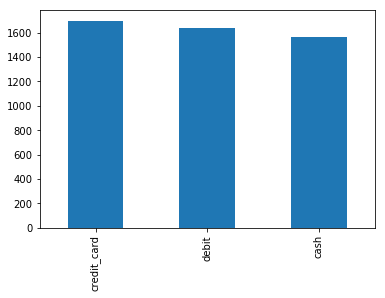

credit_card    1698
debit          1638
cash           1567
Name: payment_method, dtype: int64

In [17]:
print(shop_data_v3['payment_method'].describe())
pay.plot.bar()
plt.show()
pay

In [18]:
credit = shop_data_v3[shop_data_v3.payment_method == 'credit_card']
debit = shop_data_v3[shop_data_v3.payment_method == 'debit']
cash = shop_data_v3[shop_data_v3.payment_method == 'cash']

In [19]:
credit.mean()

order_id        2505.371614
shop_id           49.960542
user_id          849.382803
order_amount     299.873380
total_items        1.991166
per_item         150.553004
dtype: float64

In [20]:
debit.mean()

order_id        2472.727717
shop_id           49.179487
user_id          850.199634
order_amount     305.625763
total_items        2.028694
per_item         150.700244
dtype: float64

In [21]:
cash.mean()

order_id        2521.387364
shop_id           50.590300
user_id          850.018507
order_amount     294.744097
total_items        1.966177
per_item         149.920868
dtype: float64

After plotting and segmenting our data by payment method, we can see that there is actualy no major influence of AOV by this variable. The AOV ranges from \$294.74 to \$305.623. All three payment methods are used almost equally (with credit being on top), every order consists (on average) of two items, and the average per item price roughly stands at \$150 for all three methods. 

# Conclusion

In conclusion, the final AOV should be set to \$300.16. We have reached this price by removing the outliers within the dataset, while also keeping most of the data to maintain sample size (4903 out of the initial 5000). 

We have also concluded that payment method does not play a big role in affecting the adjustment of the AOV. Also, we have found two stores that we should further investigate (store 78 and 42), as they have proved to be extreme outliers.